## **1 Clasificación con k-Nearest Neighbors (kNN) usando Scikit-Learn**
---

### **1.1 Fundamentes de la Técnica**

El algoritmo **k-Nearest Neighbors (kNN)** es un método de clasificación supervisada basado en la proximidad entre los datos.

La idea central es que **un objeto se clasifica de acuerdo con la mayoría de sus vecinos más cercanos**.

Tomando como ejemplo el dataset **Iris** de `skalearn`, el cual contiene 150 observaciones de 3 tipos de flores, si un punto desconocido se parece más a los de la clase *Iris Setosa* que a los de *Iris Versicolor*, entonces será clasificado como *Iris Setosa*.

*   No requiere entrenamiento explícito.
*   Es un algoritmo no paramétrico.
*   Depende fuertemente de la distancia usada (por defecto, Euclidiana).

<br>

**Mecanismo de Clasificación:**

Para clasificar un nuevo punto de dato (patrón), el algoritmo:


1.   Calcula la distancia entre el nuevo punto y todos los puntos del conjunto de entrenamiento.
2.   Selecciona los k vecinos más cercanos (de ahí el nombre kNN).
3.   Asigna al nuevo punto la clase que sea más frecuente entre esos $k$ vecinos (es decir, votación por mayoría).


La elección del valor de $k$ es crucial: un $k$ pequeño puede ser sensible al ruido (sobreajuste), mientras que un $k$ grande puede ignorar fronteras de clase importantes (subajuste).


---

### **1.2 Modelo Matemático**

kNN no es un modelo que se "entrena" en el sentido tradicional (no aprende pesos o sesgos como el Perceptrón); su fundamento se basa puramente en la **geometría** y las **distancias**.

<br>

**Cálculo de Distancia**

La distancia más utilizada es la **Distancia Euclidiana** ($L_2$ norm), aunque también se pueden usar la Distancia Manhattan ($L_1$ norm) o la Distancia de Minkowski.

Para dos puntos $p$ (el nuevo patrón) y $q$ (un punto de entrenamiento) con $n$ características:

$$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

<br>

**Regla de Votación (Clasificación)**

Una vez que se identifican los $k$ vecinos más cercanos, la clase predicha $\hat{y}$ para el nuevo patrón $x$ se determina por la clase más frecuente:

$$\hat{y} = \underset{c \in C}{\operatorname{argmax}} \sum_{i=1}^{k} I(y_i = c)$$

Donde:

$C$: conjunto de todas las clases.

$k$: el número de vecinos.

$y_i$: la clase del vecino $i$.

$I(\cdot)$: la función indicadora (retorna 1 si la condición es verdadera, 0 en caso contrario).

---

### **1.3 Librería scikit-learn**

Utilizaremos la librería scikit-learn para la implementación de kNN.


| Componente | Descripción |
| :--- | :--- |
| `from sklearn.neighbors import KNeighborsClassifier` | Importa el modelo kNN. |
| `KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')` | Constructor de la clase. |
| `n_neighbors (k)` | El número de vecinos $k$ a considerar. Por defecto es 5. |
| `p` | Parámetro para la Distancia de Minkowski. Si $p=1$ es Distancia Manhattan; si $p=2$ es Distancia Euclidiana (default) |
| `fit(X, y)` | El método de "entrenamiento" del modelo. En kNN, simplemente almacena los datos $X$ y las etiquetas $y$. |
| `predict(X)` | El método de predicción. Calcula las distancias y realiza la votación por mayoría para los nuevos datos $X$. |
| `metric` | La función de distancia a utilizar. Por defecto es '**minkowski**'. |
| `from sklearn.metrics import...` | Funciones para calcular métricas como Matriz de Confusión y Accuracy. |

<br>

---

### **1.4 Pipeline**

**Preprocesamiento**

En esta etapa:

*   Se carga el dataset **Iris**.
*   Se realiza un **análisis estadístico básico** (media, desviación estándar, valores máximos y mínimos).
*   Se despliega un **gráfico de dispersión (scatter plot)** para observar la distribución de las clases.


Resumen estadístico del dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


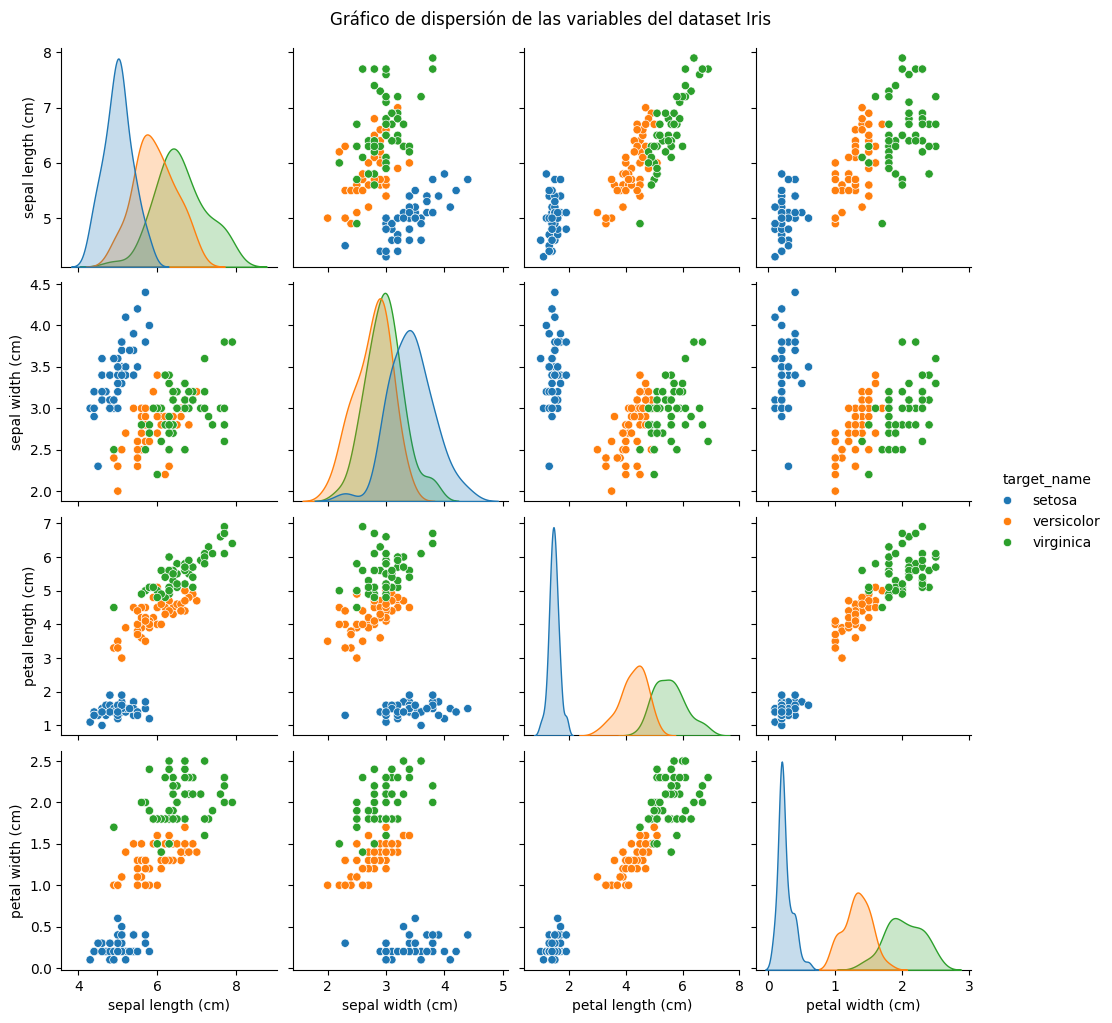

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target_name"] = df["target"].apply(lambda x: iris.target_names[x])

print("Resumen estadístico del dataset:")
print(df.describe())

sns.pairplot(df, hue="target_name", vars=iris.feature_names)
plt.suptitle("Gráfico de dispersión de las variables del dataset Iris", y=1.02)
plt.show()

**Feature Engineering**

Se seleccionan las características más relevantes para el modelo.

Usaremos solo:

*   Largo del pétalo (`petal length (cm)`)
*   Ancho del pétalo (`petal width (cm)`)

para facilitar la visualización del espacio de decisión.


In [10]:
from sklearn.model_selection import train_test_split

X = df[["petal length (cm)", "petal width (cm)"]].values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (120, 2)
Tamaño del conjunto de prueba: (30, 2)


**Model Training y Prediction**

Se entrena el modelo `KNeighborsClassifier` con $k=5$ vecinos.

Luego se define una función `clasificar_flor()` que recibe las medidas de una flor y devuelve la clase predicha.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Entrenamiento completado con éxito.")

def clasificar_flor(petal_length, petal_width):
    pred = knn.predict([[petal_length, petal_width]])[0]
    print(f"Longitud del pétalo: {petal_length}, Ancho del pétalo: {petal_width}")
    print(f"Clase predicha: {iris.target_names[pred]}")

clasificar_flor(1.5, 0.2)
clasificar_flor(5.0, 1.8)

Entrenamiento completado con éxito.
Longitud del pétalo: 1.5, Ancho del pétalo: 0.2
Clase predicha: setosa
Longitud del pétalo: 5.0, Ancho del pétalo: 1.8
Clase predicha: virginica


**Model Evaluation**

Evaluamos el modelo con las métricas:


*   **Matriz de confusión:** muestra los aciertos y errores de clasificación.
*   **Accuracy:** porcentaje total de aciertos.

Una matriz de confusión ideal muestra una diagonal perfecta (sin errores).



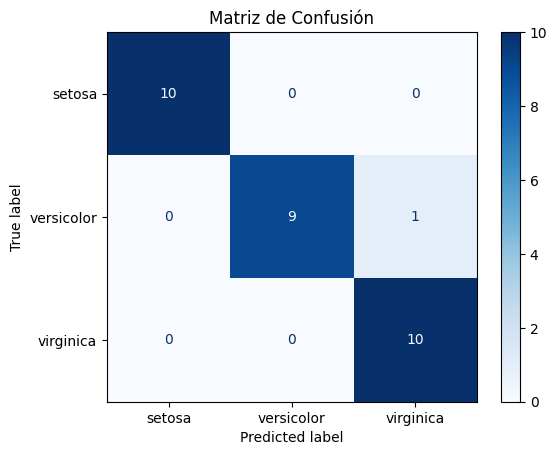

Precisión del modelo: 0.97


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acc:.2f}")

---
### **1.5 Fuentes Bibliográficas**

IBM. (s.f.). **¿Qué es el algoritmo KNN?** | IBM. https://www.ibm.com/mx-es/think/topics/knn

Cover, T., & Hart, P. (1967). **Nearest Neighbor Pattern Classification. IEEE Transactions on Information Theory.**

**¿Qué es k vecino más cercano (kNN)?** | Una guía integral sobre k vecino más cercano. (s.f.). Elastic — The Search AI Company | Elastic. https://www.elastic.co/es/what-is/knn

---
Hecho por **Luis Angel De La Cruz Ascencio**



